In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [ ]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.shape

(4990708, 11)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4990703,352,CASH_IN,243672.21,C1661978660,4109739.43,4353411.64,C1740749667,3285371.51,3041699.30,0.0,0.0
4990704,352,CASH_IN,47273.66,C254347698,4353411.64,4400685.30,C580871681,70040.08,22766.42,0.0,0.0
4990705,352,CASH_IN,331012.47,C575242139,4400685.30,4731697.77,C1919566362,6231207.81,5900195.33,0.0,0.0
4990706,352,CASH_IN,28611.88,C1309715125,4731697.77,4760309.65,C1094706473,3836435.55,3490835.63,0.0,0.0


In [ ]:
# Correcting inconsistency in column name
df = df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'})

In [ ]:
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4990702,352,CASH_IN,4112.04,C1196784643,4105627.39,4109739.43,C665608628,328509.90,324397.86,0.0,0.0
4990703,352,CASH_IN,243672.21,C1661978660,4109739.43,4353411.64,C1740749667,3285371.51,3041699.30,0.0,0.0
4990704,352,CASH_IN,47273.66,C254347698,4353411.64,4400685.30,C580871681,70040.08,22766.42,0.0,0.0
4990705,352,CASH_IN,331012.47,C575242139,4400685.30,4731697.77,C1919566362,6231207.81,5900195.33,0.0,0.0


In [ ]:
df.isnull().values.any()

True

In [ ]:
print('The proportion of total transactions labeled as fraudulent is',df['isFraud'].value_counts()[1]/df['isFraud'].size)

The proportion of total transactions labeled as fraudulent is 0.0007872630496514723


0.0    4986778
1.0       3929
Name: isFraud, dtype: int64

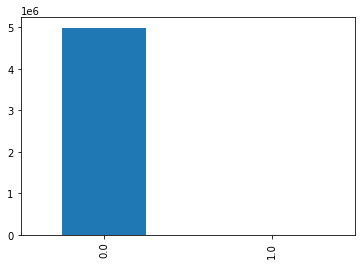

In [ ]:
df['isFraud'].value_counts().plot(kind='bar')
df['isFraud'].value_counts()

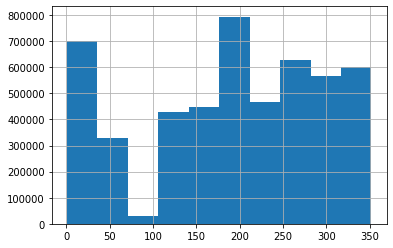

In [ ]:
df['step'].hist()

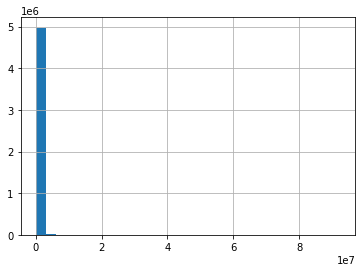

In [ ]:
df['amount'].hist(bins=30)

In [ ]:
print('The average transaction amount is',df['amount'].mean())

The average transaction amount is 181257.02708096674


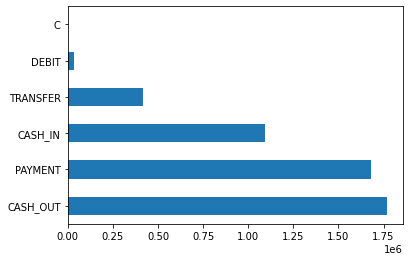

In [ ]:
df['type'].value_counts().plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f055e3ee970>,
      dtype=object)

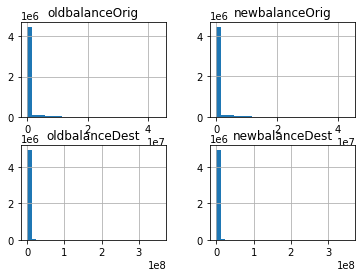

In [ ]:
df[['oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].hist(bins=30)

In [ ]:
print('Average balance values:')

with pd.option_context('display.float_format','{:.2f}'.format):
    print(df[['oldbalanceOrig','newbalanceOrig','oldbalanceDest','newbalanceDest']].mean())



Average balance values:
oldbalanceOrig    842227.58
newbalanceOrig    864053.92
oldbalanceDest   1066114.45
newbalanceDest   1196703.41
dtype: float64


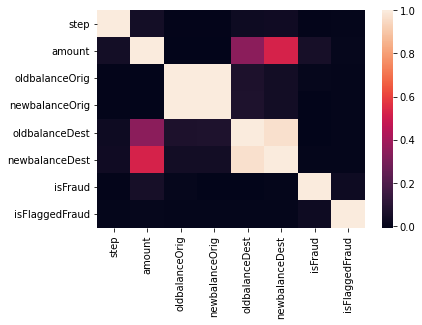

In [ ]:
ُُcorr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

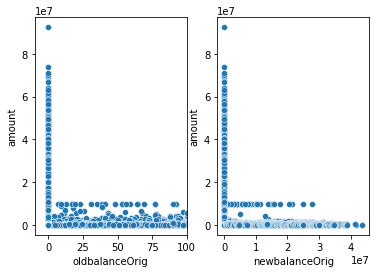

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].set_xlim([-10,100])

sns.scatterplot(data=df, x='oldbalanceOrig', y='amount', ax=ax[0])
sns.scatterplot(data=df, x='newbalanceOrig', y='amount', ax=ax[1])

fig.show()

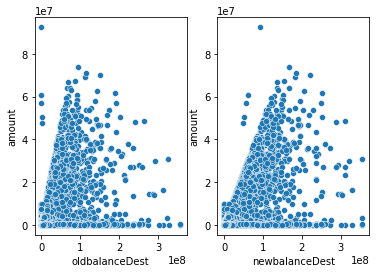

In [ ]:
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=df, x='oldbalanceDest', y='amount', ax=ax[0])
sns.scatterplot(data=df, x='newbalanceDest', y='amount', ax=ax[1])

fig.show()

In [ ]:
df['merchant'] = df['nameDest'].str.contains('M')

df.head(10)



,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,True
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,True
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,True
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,True
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,True
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,False


In [ ]:
df[['isFraud','merchant']].value_counts()

isFraud  merchant
0.0      False       3304366
         True        1682412
1.0      False          3929
dtype: int64

In [ ]:
df[df['isFraud']==1].head(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1.0,0.0,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1.0,0.0,False
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1.0,0.0,False
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1.0,0.0,False
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1.0,0.0,False
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1.0,0.0,False
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1.0,0.0,False
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1.0,0.0,False
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1.0,0.0,False
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1.0,0.0,False


In [ ]:
# Counts of each transaction type for fraudulent transactions
df[df['isFraud']==1]['type'].value_counts()



CASH_OUT    1974
TRANSFER    1955
Name: type, dtype: int64

In [ ]:
df['balancediffOrig'] = df['newbalanceOrig'] - df['oldbalanceOrig']
df['balancediffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

df.head(10)



,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,merchant,balancediffOrig,balancediffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0,True,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0,True,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0,False,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0,False,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0,True,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0,True,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0,True,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0,True,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0,True,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0,False,-5337.77,-1549.21


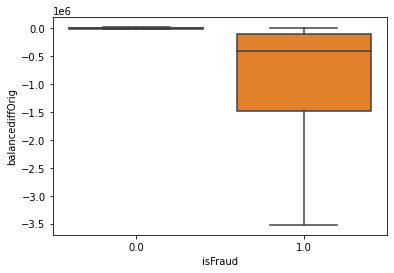

In [ ]:
sns.boxplot(x="isFraud", y="balancediffOrig", data=df,showfliers=False)



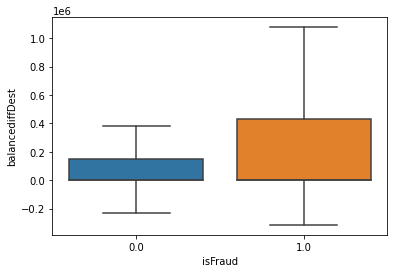

In [ ]:
sns.boxplot(x="isFraud", y="balancediffDest", data=df, showfliers=False)

In [ ]:
features = ['step',
            'type',
            'amount',
            'oldbalanceOrig',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest',
            'balancediffOrig',
            'balancediffDest',
            'merchant']

label = ['isFraud']

In [ ]:
# Number of data points in the minority class
number_records_fraud = len(df[df.isFraud == 1])
fraud_indices = df[df.isFraud == 1].index.values

# Picking the indices of the normal classes
normal_indices = df[df.isFraud == 0].index

# Out of the indices we picked, randomly select "x" number (x - same as total fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = df.iloc[under_sample_indices, :]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'isFraud']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'isFraud']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.isFraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.isFraud == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  7858


In [ ]:
X = X_undersample[features]
y = y_undersample[label]

In [ ]:
#One-Hot encoding
# After encoding (scroll right to see new columns)
X = X.join(pd.get_dummies(X[['type']], prefix='type')).drop(['type'], axis=1)
X.head()



,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,balancediffOrig,balancediffDest,merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2,1,181.0,181.0,0.0,0.0,0.0,-181.0,0.0,False,0,0,0,0,1
3,1,181.0,181.0,0.0,21182.0,0.0,-181.0,-21182.0,False,0,1,0,0,0
251,1,2806.0,2806.0,0.0,0.0,0.0,-2806.0,0.0,False,0,0,0,0,1
252,1,2806.0,2806.0,0.0,26202.0,0.0,-2806.0,-26202.0,False,0,1,0,0,0
680,1,20128.0,20128.0,0.0,0.0,0.0,-20128.0,0.0,False,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(5500, 14)
(5500, 1)
(2358, 14)
(2358, 1)


In [ ]:
X_test

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,balancediffOrig,balancediffDest,merchant,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
345797,16,65912.68,10664202.02,10730114.70,1059724.63,993811.94,65912.68,-65912.69,False,1,0,0,0,0
4785683,344,2231580.50,2231580.50,0.00,499195.63,2730776.13,-2231580.50,2231580.50,False,0,1,0,0,0
4541166,326,478078.24,478078.24,0.00,0.00,0.00,-478078.24,0.00,False,0,0,0,0,1
2714392,211,5996.29,23900.00,17903.71,0.00,0.00,-5996.29,0.00,True,0,0,0,1,0
1030619,78,178569.48,178569.48,0.00,0.00,0.00,-178569.48,0.00,False,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270610,187,152.03,293306.12,293154.09,0.00,0.00,-152.03,0.00,True,0,0,0,1,0
1030764,91,737285.03,737285.03,0.00,0.00,737285.03,-737285.03,737285.03,False,0,1,0,0,0
3959648,289,196149.04,196149.04,0.00,0.00,0.00,-196149.04,0.00,False,0,0,0,0,1
1811515,163,75933.01,867.00,0.00,0.00,75933.01,-867.00,75933.01,False,0,1,0,0,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 3193210 to 4656586
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   step             5500 non-null   int64  
 1   amount           5500 non-null   float64
 2   oldbalanceOrig   5500 non-null   float64
 3   newbalanceOrig   5500 non-null   float64
 4   oldbalanceDest   5500 non-null   float64
 5   newbalanceDest   5500 non-null   float64
 6   balancediffOrig  5500 non-null   float64
 7   balancediffDest  5500 non-null   float64
 8   merchant         5500 non-null   object 
 9   type_CASH_IN     5500 non-null   uint8  
 10  type_CASH_OUT    5500 non-null   uint8  
 11  type_DEBIT       5500 non-null   uint8  
 12  type_PAYMENT     5500 non-null   uint8  
 13  type_TRANSFER    5500 non-null   uint8  
dtypes: float64(7), int64(1), object(1), uint8(5)
memory usage: 456.5+ KB


In [ ]:
#Decision tree
dt_clf = DecisionTreeClassifier(random_state=1)

dt_clf = dt_clf.fit(X_train,y_train)

y_pred = dt_clf.predict(X_test)

In [ ]:
result = pd.DataFrame({'actual':y_test['isFraud'], 'predicted':y_pred})
result[result['actual']==1]

,actual,predicted
4785683,1.0,1.0
4541166,1.0,1.0
1030619,1.0,1.0
4858,1.0,1.0
58308,1.0,1.0
...,...,...
3611023,1.0,1.0
3186835,1.0,1.0
1615122,1.0,1.0
1030764,1.0,1.0


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1197
         1.0       0.98      0.99      0.99      1161

    accuracy                           0.99      2358
   macro avg       0.99      0.99      0.99      2358
weighted avg       0.99      0.99      0.99      2358

AUC: 0.9873391489058564


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


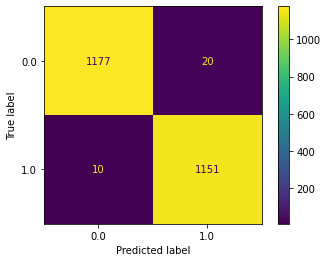

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(dt_clf, X_test, y_test)

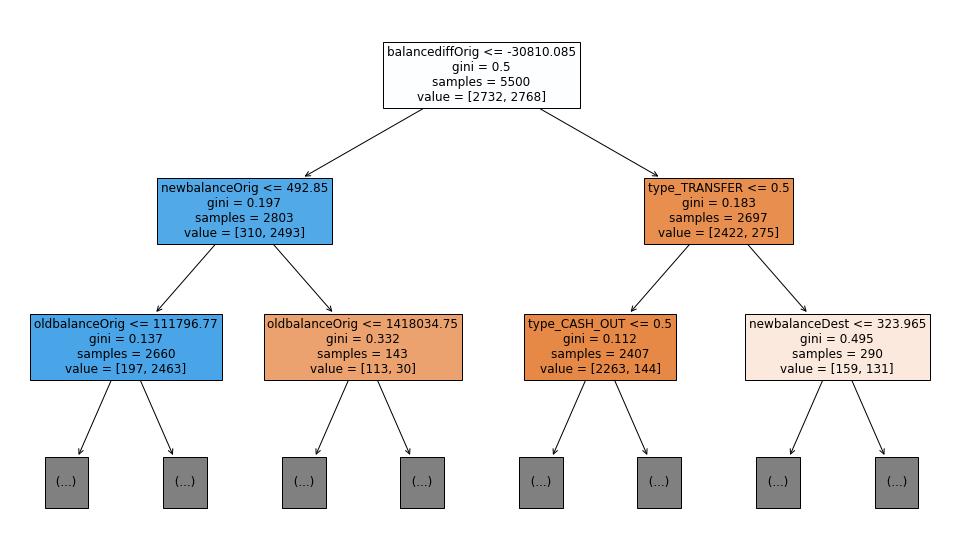

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(17,10))
_ = plot_tree(dt_clf, max_depth=2, feature_names=list(X_train.columns), filled=True, fontsize=12)

In [ ]:
fi = pd.DataFrame({'features':X_train.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
6,balancediffOrig,0.647906
1,amount,0.127188
3,newbalanceOrig,0.068661
5,newbalanceDest,0.049142
2,oldbalanceOrig,0.044090
13,type_TRANSFER,0.033124
10,type_CASH_OUT,0.012515
0,step,0.005810
4,oldbalanceDest,0.005394
7,balancediffDest,0.004844


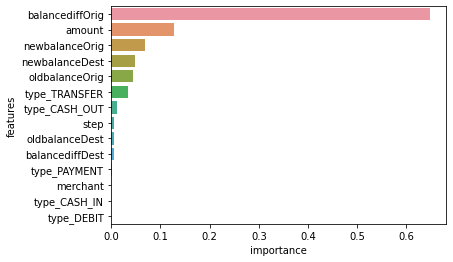

In [ ]:
sns.barplot(x="importance", y="features", data=fi)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      1197
         1.0       0.95      0.90      0.92      1161

    accuracy                           0.93      2358
   macro avg       0.93      0.93      0.93      2358
weighted avg       0.93      0.93      0.93      2358

AUC: 0.9266771580113073


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


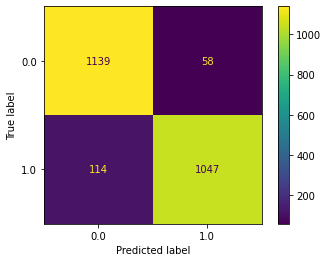

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(lr, X_test, y_test)

In [ ]:
trainX = X_train.copy()
testX = X_test.copy()

In [ ]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 3193210 to 4656586
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   step             5500 non-null   int64  
 1   amount           5500 non-null   float64
 2   oldbalanceOrig   5500 non-null   float64
 3   newbalanceOrig   5500 non-null   float64
 4   oldbalanceDest   5500 non-null   float64
 5   newbalanceDest   5500 non-null   float64
 6   balancediffOrig  5500 non-null   float64
 7   balancediffDest  5500 non-null   float64
 8   merchant         5500 non-null   object 
 9   type_CASH_IN     5500 non-null   uint8  
 10  type_CASH_OUT    5500 non-null   uint8  
 11  type_DEBIT       5500 non-null   uint8  
 12  type_PAYMENT     5500 non-null   uint8  
 13  type_TRANSFER    5500 non-null   uint8  
dtypes: float64(7), int64(1), object(1), uint8(5)
memory usage: 456.5+ KB


In [ ]:
testX = testX.drop(['merchant'],axis=1)

In [ ]:
trainX = trainX.drop(['merchant'],axis=1)

In [ ]:
clf = XGBClassifier()
probabilities = clf.fit(trainX, y_train).predict_proba(testX)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities[:, 1])))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:, 1])
print('AUC:', metrics.auc(fpr, tpr))

AUPRC = 0.9978241521470007
AUC: 0.9977441450309668


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


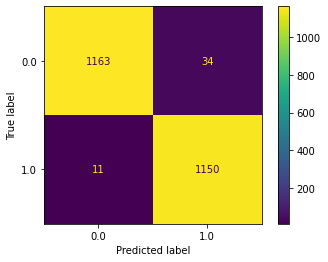

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(clf, testX, y_test)

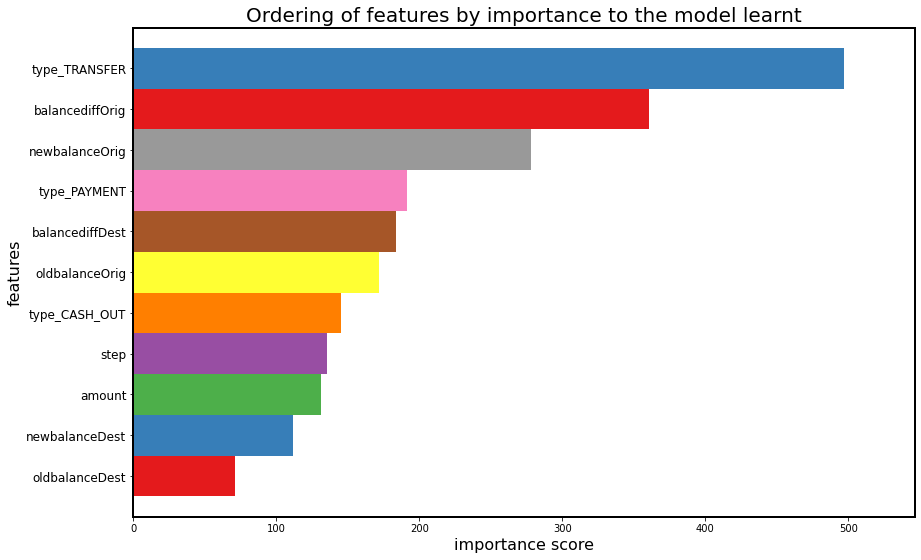

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

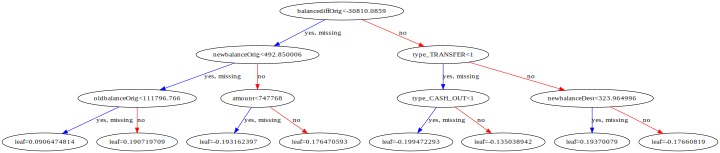

In [ ]:
g = to_graphviz(clf)
g.attr(size='10,10')
g

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
r_clf=RandomForestClassifier()
r_clf.fit(X_train,y_train)
y_pred = r_clf.predict(X_test)

<ipython-input-83-e977a33c8cef>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_clf.fit(X_train,y_train)


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1197
         1.0       0.98      0.99      0.99      1161

    accuracy                           0.99      2358
   macro avg       0.99      0.99      0.99      2358
weighted avg       0.99      0.99      0.99      2358

AUC: 0.9852505941857227


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


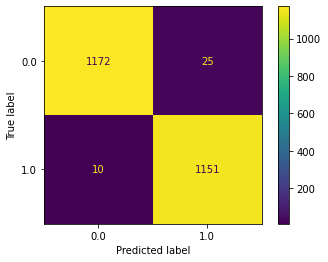

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(r_clf, X_test, y_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)


# fiting PCA on the dataset
pca.fit(X_train)


PCA(random_state=42, svd_solver='randomized')

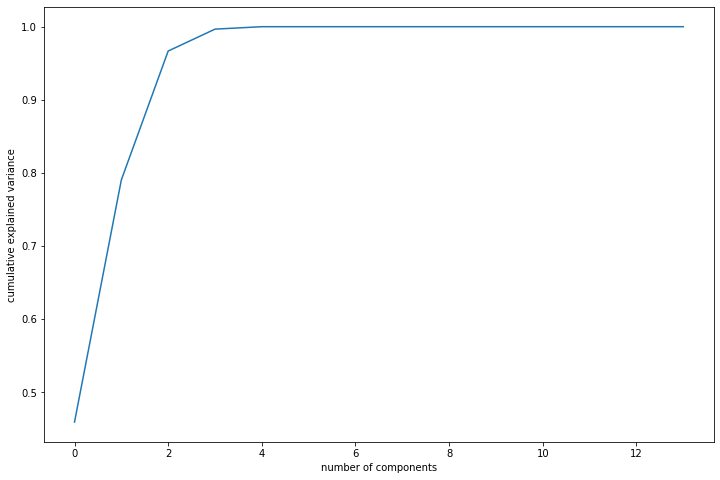

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [ ]:
df_pca_train = pca_final.fit_transform(X_train)
df_pca_train.shape


(5500, 4)

In [ ]:
df_pca_test = pca_final.fit_transform(X_test)
df_pca_test.shape


(2358, 4)

In [ ]:
pc_trian = np.transpose(df_pca_train)
pc_test = np.transpose(df_pca_test)

In [ ]:
pcs_df_train = pd.DataFrame({'PC1':pc_trian[0],'PC2':pc_trian[1],'PC3':pc_trian[2],'PC4':pc_trian[3]})
pcs_df_test = pd.DataFrame({'PC1':pc_test[0],'PC2':pc_test[1],'PC3':pc_test[2],'PC4':pc_test[3]})


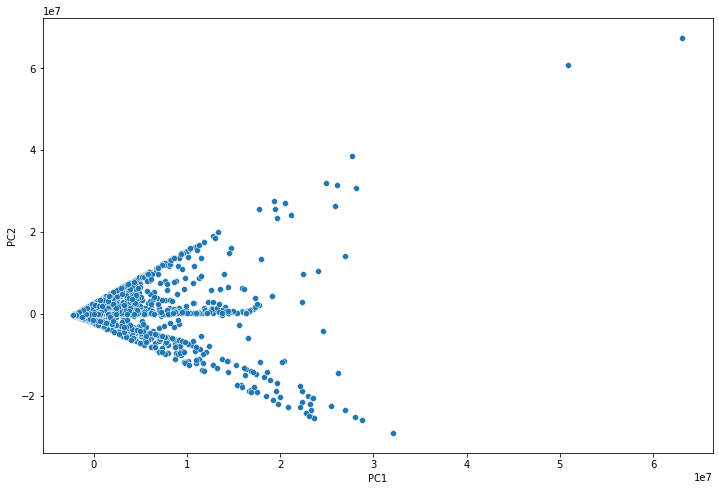

In [ ]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',data=pcs_df_train)
plt.show()



In [ ]:
#Decision tree with pca
dt_clf_pca = DecisionTreeClassifier(random_state=1)

dt_clf_pca = dt_clf_pca.fit(pcs_df_train,y_train)

y_pred = dt_clf_pca.predict(pcs_df_test)

In [ ]:
result_pca = pd.DataFrame({'actual':y_test['isFraud'], 'predicted':y_pred})
result[result['actual']==1]

,actual,predicted
4785683,1.0,1.0
4541166,1.0,1.0
1030619,1.0,1.0
4858,1.0,1.0
58308,1.0,1.0
...,...,...
3611023,1.0,1.0
3186835,1.0,1.0
1615122,1.0,1.0
1030764,1.0,1.0


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      1197
         1.0       0.81      0.63      0.71      1161

    accuracy                           0.75      2358
   macro avg       0.76      0.74      0.74      2358
weighted avg       0.76      0.75      0.74      2358

AUC: 0.7441828084422945


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


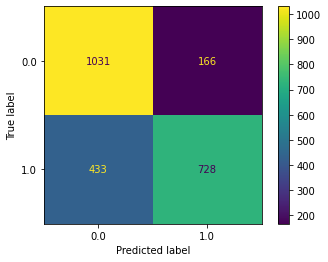

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(dt_clf_pca, pcs_df_test, y_test)

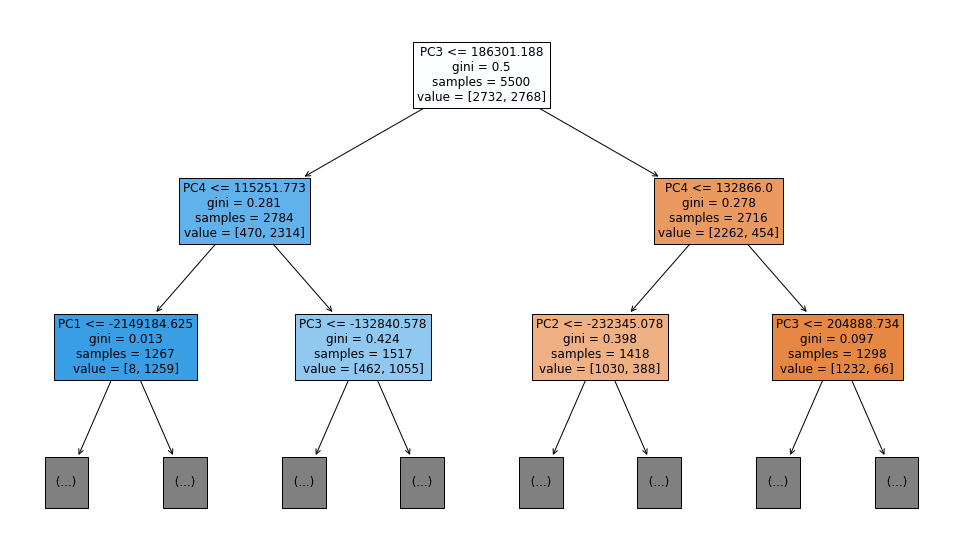

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(17,10))
_ = plot_tree(dt_clf_pca, max_depth=2, feature_names=list(pcs_df_train.columns), filled=True, fontsize=12)

In [ ]:
fi_pca = pd.DataFrame({'features':pcs_df_train.columns,'importance':dt_clf_pca.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi_pca

,features,importance
2,PC3,0.608324
3,PC4,0.225104
1,PC2,0.102422
0,PC1,0.064150


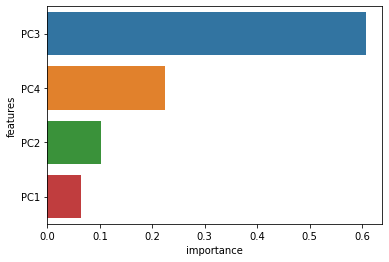

In [ ]:
sns.barplot(x="importance", y="features", data=fi_pca)

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr_pca = LogisticRegression()
lr_pca.fit(pcs_df_train,y_train)
y_pred = lr_pca.predict(pcs_df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81      1197
         1.0       1.00      0.52      0.69      1161

    accuracy                           0.76      2358
   macro avg       0.84      0.76      0.75      2358
weighted avg       0.84      0.76      0.75      2358

AUC: 0.7605771534780101


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


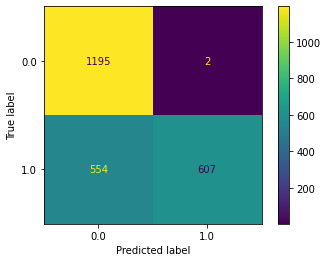

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(lr_pca, pcs_df_test, y_test)

In [ ]:
clf_pca = XGBClassifier()
probabilities_pca = clf_pca.fit(pcs_df_train, y_train).predict_proba(pcs_df_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('AUPRC = {}'.format(average_precision_score(y_test, \
                                              probabilities_pca[:, 1])))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities_pca[:, 1])
print('AUC:', metrics.auc(fpr, tpr))

AUPRC = 0.9467775072169025
AUC: 0.9468201079788187


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


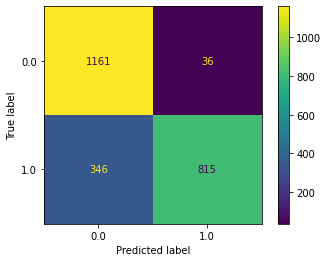

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(clf_pca, pcs_df_test, y_test)

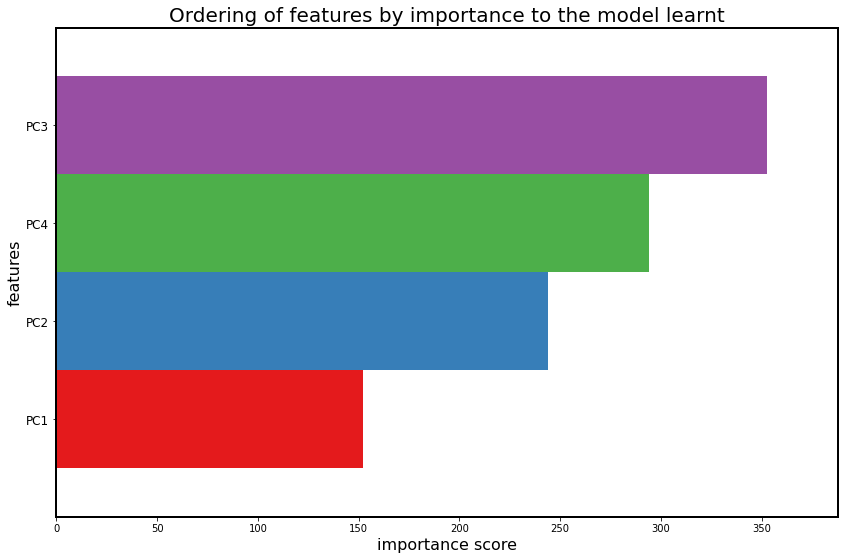

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf_pca, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

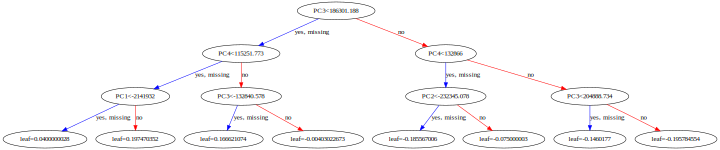

In [ ]:
g = to_graphviz(clf_pca)
g.attr(size='10,10')
g

In [ ]:
#random forest
r_clf_pca=RandomForestClassifier()
r_clf_pca.fit(pcs_df_train,y_train)
y_pred = r_clf_pca.predict(pcs_df_test)

<ipython-input-120-95a9dfd80ffa>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_clf_pca.fit(pcs_df_train,y_train)


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC:', metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      1197
         1.0       0.94      0.63      0.76      1161

    accuracy                           0.80      2358
   macro avg       0.84      0.80      0.79      2358
weighted avg       0.84      0.80      0.79      2358

AUC: 0.7981581861630821


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


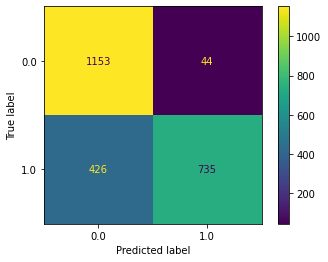

In [ ]:
# Confusion matrix
metrics.plot_confusion_matrix(r_clf_pca, pcs_df_test, y_test)